In [1]:
# Importing libraries #
import re, string
import nltk
import pickle
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sn
import language_tool_python
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from textacy import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline

tool = language_tool_python.LanguageTool('es-US')
stemmer = SnowballStemmer('spanish')

In [15]:
# Importing Data #

# Model Solicitante #
y_test_solicitante = np.loadtxt("modelGraphData/data_model_solicitante_yTest.csv", delimiter=',')
y_pred_proba_solicitante = np.loadtxt("modelGraphData/data_model_solicitante_yProba.csv", delimiter=',')

#Model Ubicacion #
y_test_ubicacion = np.loadtxt("modelGraphData/data_model_ubicacion_yTest.csv", delimiter=',')
y_pred_proba_ubicacion = np.loadtxt("modelGraphData/data_model_ubicacion_yProba.csv", delimiter=',')

#Model Victimario #
y_test_victimario = np.loadtxt("modelGraphData/data_model_victimario_yTest.csv", delimiter=',')
y_pred_proba_victimario = np.loadtxt("modelGraphData/data_model_victimario_yProba.csv", delimiter=',')

#Model Perdida #
y_test_perdida= np.loadtxt("modelGraphData/data_model_perdida_yTest.csv", delimiter=',')
y_pred_proba_perdida = np.loadtxt("modelGraphData/data_model_perdida_yProba.csv", delimiter=',')

#Model decision #
y_test_decision = np.loadtxt("modelGraphData/data_model_decision_yTest.csv", delimiter=',')
y_pred_proba_decision = np.loadtxt("modelGraphData/data_model_decision_yProba.csv", delimiter=',')

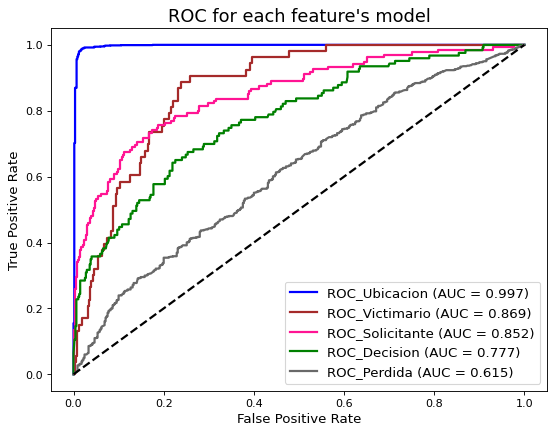

In [54]:
# Ploting ROC curve #
#metrics.plot_roc_curve(model,X_test_vectors_tfidf, y_test)
fpr1, tpr1, _1 = metrics.roc_curve(y_test_solicitante, y_pred_proba_solicitante)
fpr2, tpr2, _2 = metrics.roc_curve(y_test_ubicacion, y_pred_proba_ubicacion)
fpr3, tpr3, _3 = metrics.roc_curve(y_test_victimario, y_pred_proba_victimario)
fpr4, tpr4, _4 = metrics.roc_curve(y_test_perdida, y_pred_proba_perdida)
fpr5, tpr5, _5 = metrics.roc_curve(y_test_decision, y_pred_proba_decision)

# Calculating AUC's #
auc_solicitante = metrics.auc(fpr1,tpr1)
auc_ubicacion = metrics.auc(fpr2,tpr2)
auc_victimario = metrics.auc(fpr3,tpr3)
auc_perdida = metrics.auc(fpr4,tpr4)
auc_decision = metrics.auc(fpr5,tpr5)

#Plotting#
plt.figure(figsize=(8, 6), dpi=80)
plt.title("ROC for each feature's model", fontsize=16)
plt.plot(fpr2,tpr2,
    label="ROC_Ubicacion (AUC = {0:0.3f})".format(auc_ubicacion),
    color="blue", linewidth= 2)
plt.plot(fpr3,tpr3,
    label="ROC_Victimario (AUC = {0:0.3f})".format(auc_victimario),
    color="brown", linewidth= 2)
plt.plot(fpr1,tpr1,
    label="ROC_Solicitante (AUC = {0:0.3f})".format(auc_solicitante),
    color="deeppink", linewidth= 2)
plt.plot(fpr5, tpr5,
    label="ROC_Decision (AUC = {0:0.3f})".format(auc_decision),
    color="green", linewidth= 2)
plt.plot(fpr4,tpr4,
    label="ROC_Perdida (AUC = {0:0.3f})".format(auc_perdida),
    color="dimgray", linewidth= 2)
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.legend(loc=0, prop={'size': 12})
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.show()